# BIGMART SALES PREDICTION using MACHINE LEARNING

# Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# Importing Dataset

In [2]:
testdata=pd.read_csv("Dataset\Test.csv")

In [3]:
data=pd.read_csv("Dataset\Train.csv")

In [4]:
# dupvaldrop=traindata.drop_duplicates()

# Using Head,shape,info,describe functions

In [5]:
data.head() #telling first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.shape #telling rows n columns

(8523, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# EDA

## Checking Nan Values

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Filling Numerical Nan Values by Median

In [10]:
median_item_weight=data['Item_Weight'].median()

In [11]:
data['Item_Weight'].replace(np.nan,median_item_weight,inplace=True)

## Filling Categorical Nan Values by Mode

In [12]:
frequency=data.groupby(['Outlet_Size']) 
frequency.size() #as medium is most frequent mode will be replacing nan values of outlet_size with medium

Outlet_Size
High       932
Medium    2793
Small     2388
dtype: int64

In [13]:
mode_outlet_size=data['Outlet_Size'].mode().values[0]
data['Outlet_Size'] = data['Outlet_Size'].fillna(mode_outlet_size)

In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
frequency=data.groupby(['Outlet_Size']) #now medium frequency is much higher
frequency.size()

Outlet_Size
High       932
Medium    5203
Small     2388
dtype: int64

## Checking Duplicate Values

In [17]:
dups=data.duplicated()
print(dups.sum()) #there are no duplicate values in the set

0


## Handling Outliers

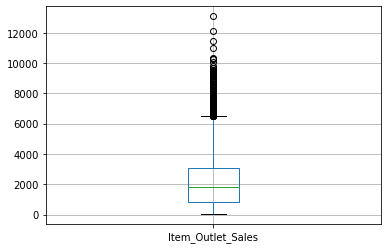

In [18]:
data.boxplot(column=["Item_Outlet_Sales"])
plt.show()

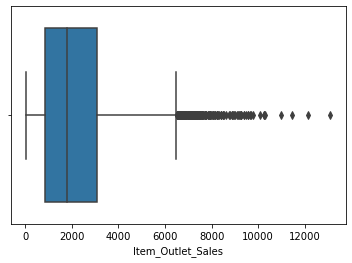

In [19]:
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.show()

In [20]:
data2=data.sort_values('Item_Outlet_Sales')
data2=data2.reset_index()

In [21]:
q1=data2['Item_Outlet_Sales'].quantile(.25)
q3=data2['Item_Outlet_Sales'].quantile(.75)
IQR=q3-q1

In [22]:
newq1=q1-1.5*(IQR)
newq3=q3+1.5*(IQR)

data2.drop(data2[data2['Item_Outlet_Sales']>newq3].index,axis=0,inplace =True)
data2.drop(data2[data2['Item_Outlet_Sales']<newq1].index,axis=0,inplace= True)

<AxesSubplot:>

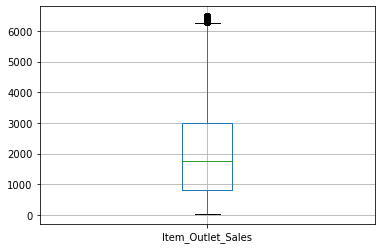

In [23]:
data2.boxplot(column=["Item_Outlet_Sales"])

In [24]:
data2.describe()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,4265.306945,12.814609,0.066358,139.161087,1997.968094,2059.362844
std,2458.946088,4.251466,0.051838,61.553351,8.309941,1506.099754
min,0.000000,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,2140.000000,9.300000,0.027028,93.046200,1987.000000,810.944400
50%,4264.000000,12.600000,0.053939,141.215400,1999.000000,1747.059200
75%,6394.000000,16.100000,0.095299,183.695000,2004.000000,2998.097400
max,8522.000000,21.350000,0.328391,266.888400,2009.000000,6478.234000


In [25]:
data2.shape

(8337, 13)

## Correcting irregularities

In [26]:
data2['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [27]:
data2.Item_Fat_Content.value_counts() #now lf , ref ,low fat all changed to two types 

Low Fat    5394
Regular    2943
Name: Item_Fat_Content, dtype: int64

## Checking Coorelation

In [28]:
data2.corr()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
index,1.000000,-0.024888,-0.000357,0.004161,-0.000089,-0.001972
Item_Weight,-0.024888,1.000000,-0.014009,0.026228,0.006263,0.012764
Item_Visibility,-0.000357,-0.014009,1.000000,0.003848,-0.081398,-0.131628
Item_MRP,0.004161,0.026228,0.003848,1.000000,0.024550,0.553334
Outlet_Establishment_Year,-0.000089,0.006263,-0.081398,0.024550,1.000000,0.007101
Item_Outlet_Sales,-0.001972,0.012764,-0.131628,0.553334,0.007101,1.000000


# BiVariate Analysis

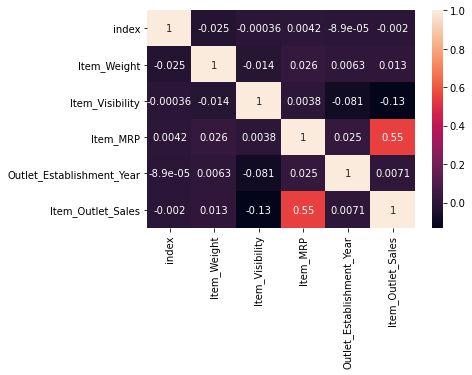

In [29]:
sns.heatmap(data2.corr(),annot = True)
plt.show()
#it's showing Item_MRP and Item_Outlet_Sales are strongely related 

# UniVariate Analysis

### Analysis on Categorical Features with Sales

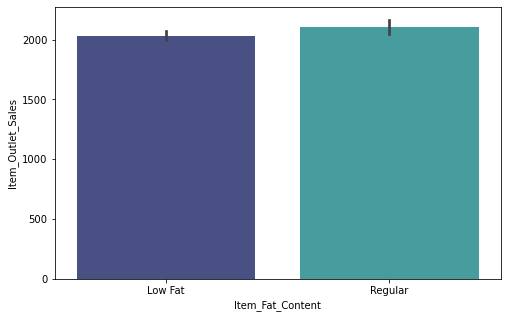

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=data2,palette='mako')
plt.show()

Item Outlet Sales are almost same for Low Fat and Regular Products

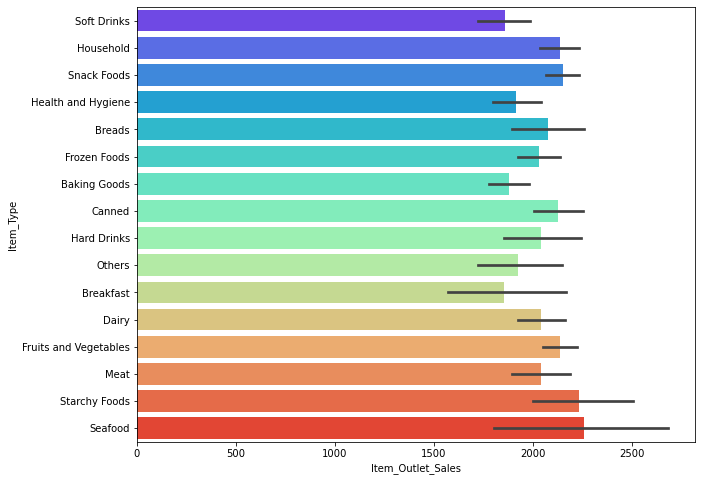

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=data2,palette='rainbow')
plt.show()

Item Outlet Sales are most for SeaFood and Starchy Foods

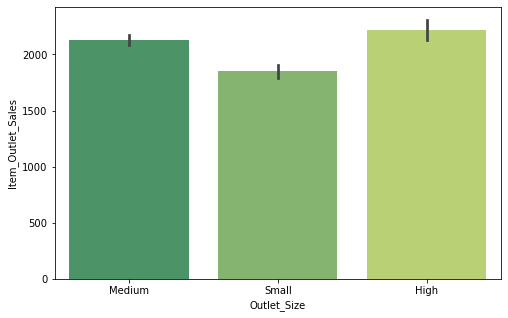

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data2,palette='summer')
plt.show()

Item Outlet Sales are almost same for Medium and High size outlets

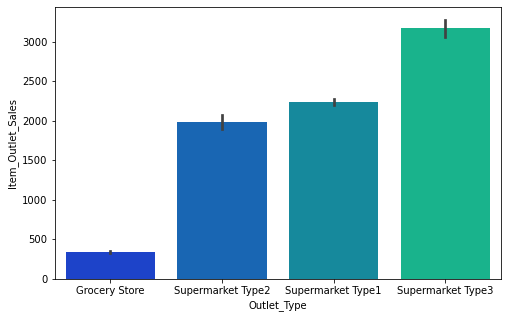

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data2,palette='winter')
plt.show()

Item Outlet Sales are most for Supermarket Type3

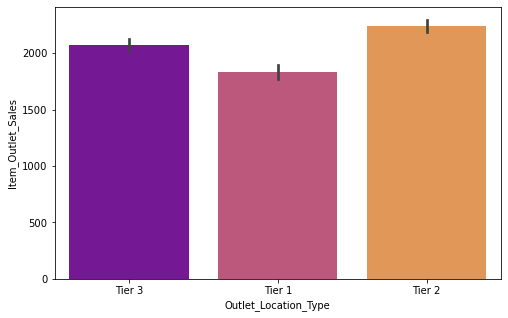

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data2,palette='plasma')
plt.show()

Item Outlet Sales are most for Tier 2 Location Type

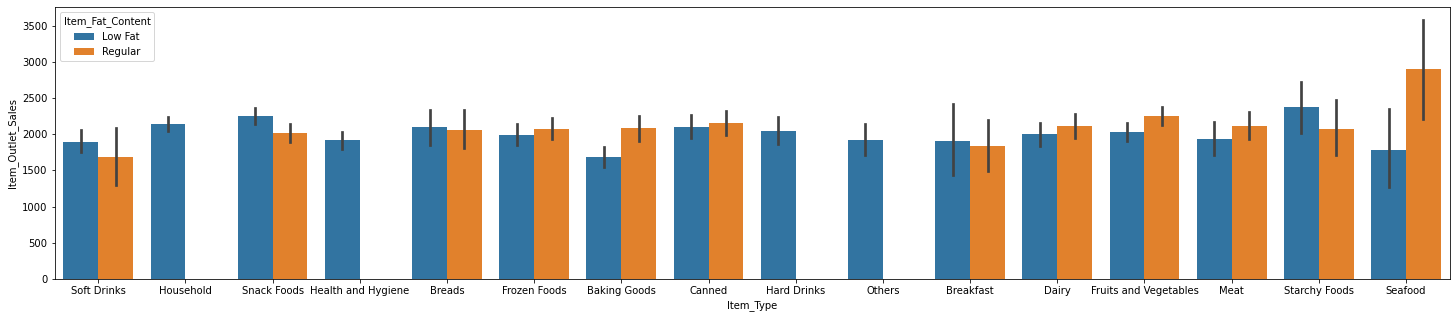

In [35]:
plt.figure(figsize=(25,5))
sns.barplot(x=data2['Item_Type'], y=data2['Item_Outlet_Sales'],hue=data2['Item_Fat_Content'])
plt.show()

Although Fat is most in Seafood yet it's sales are highest

### Analysis on Numerical Features with Sales

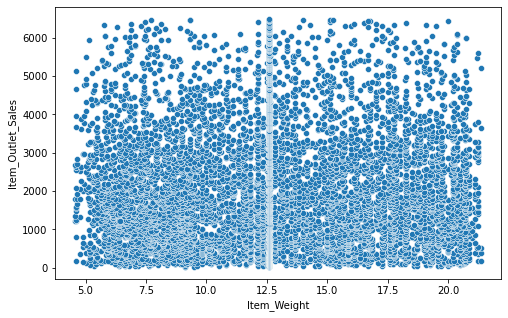

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=data2)
plt.show()

Item_weight 12.5 has highest Sales

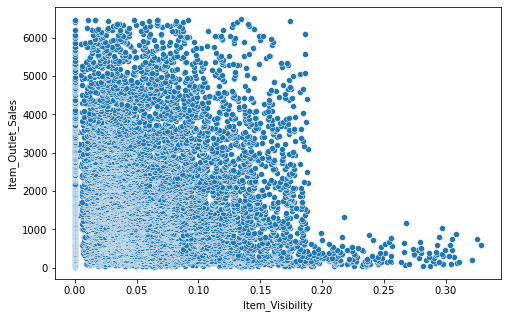

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=data2)
plt.show()

Items with Visibility 0.2 - 0.3 has very low sales

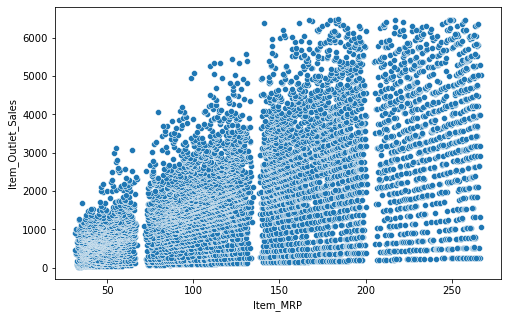

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=data2)
plt.show()

Items ranging price 200-250 has highest sales

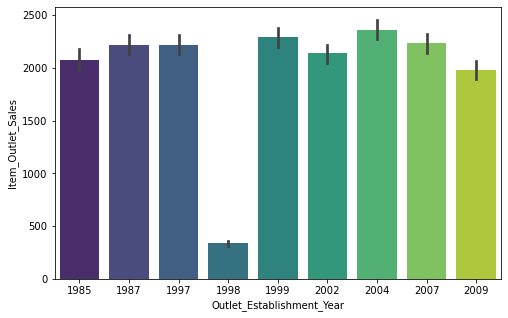

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data2,palette='viridis')
plt.show()

Establishment years have no effect on Item sales although Outlets established in 1998 sales have very less sales

# Feature Engineering

## Label Encoding

In [40]:
#data2['Outlet_Location_Type_Encoded']=data2['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [41]:
#data2.head()

## One Hot Coding

In [43]:
#Outlet_Type_Dummies=pd.get_dummies(data2.Outlet_Type)

In [44]:
#pd.concat([data2['Outlet_Type'], Outlet_Type_Dummies], axis=1)

In [45]:
data2 = data2.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
data2 = data2.drop(['index'],axis=1)

In [55]:
categorical = data2.select_dtypes(include =[object])
categorical

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Soft Drinks,Medium,Tier 3,Grocery Store
1,Low Fat,Household,Medium,Tier 3,Grocery Store
2,Regular,Snack Foods,Small,Tier 1,Grocery Store
3,Low Fat,Health and Hygiene,Small,Tier 1,Grocery Store
4,Regular,Breads,Medium,Tier 3,Grocery Store
...,...,...,...,...,...
8332,Low Fat,Dairy,High,Tier 3,Supermarket Type1
8333,Low Fat,Canned,High,Tier 3,Supermarket Type1
8334,Low Fat,Dairy,Medium,Tier 3,Supermarket Type3
8335,Low Fat,Snack Foods,Medium,Tier 3,Supermarket Type3


In [47]:
data2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.500,Low Fat,0.000000,Soft Drinks,32.8900,Medium,Tier 3,Grocery Store,33.2900
1,9.105,Low Fat,0.064411,Household,33.3900,Medium,Tier 3,Grocery Store,33.2900
2,12.600,Regular,0.134328,Snack Foods,35.0558,Small,Tier 1,Grocery Store,33.9558
3,12.600,Low Fat,0.073077,Health and Hygiene,34.3216,Small,Tier 1,Grocery Store,34.6216
4,7.155,Regular,0.281510,Breads,33.8874,Medium,Tier 3,Grocery Store,35.2874


In [56]:
data2=pd.get_dummies(data2, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(data2.shape)

(8337, 32)


In [57]:
data2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.500,0.000000,32.8900,33.2900,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,9.105,0.064411,33.3900,33.2900,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,12.600,0.134328,35.0558,33.9558,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,12.600,0.073077,34.3216,34.6216,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,7.155,0.281510,33.8874,35.2874,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [58]:
le = LabelEncoder()

for i in categorical.columns:
    data2[i] = le.fit_transform(data2[i])

In [59]:
data2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.500,0,0.000000,14,32.8900,1,2,0,33.2900
1,9.105,0,0.064411,9,33.3900,1,2,0,33.2900
2,12.600,1,0.134328,13,35.0558,2,0,0,33.9558
3,12.600,0,0.073077,8,34.3216,2,0,0,34.6216
4,7.155,1,0.281510,1,33.8874,1,2,0,35.2874


## Splitting into Test and Train

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(data2.drop( 'Item_Outlet_Sales', axis=1),
                                                    data2['Item_Outlet_Sales'],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape,X_test.shape


((6669, 8), (1668, 8))

# Feature Scaling

In [69]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [72]:
X_train_scaled

array([[-0.05316991, -0.73618294,  1.05744084, ..., -0.28212113,
         1.10273852,  2.34425444],
       [-0.3116458 ,  1.35835802, -0.55503905, ..., -0.28212113,
        -0.13658794, -0.23239704],
       [-0.05316991, -0.73618294, -0.78398057, ..., -0.28212113,
         1.10273852,  2.34425444],
       ...,
       [ 1.41544311, -0.73618294, -0.27737209, ...,  1.39327138,
        -1.37591439, -0.23239704],
       [-0.05316991, -0.73618294, -1.00684802, ..., -0.28212113,
         1.10273852,  2.34425444],
       [ 0.18180817,  1.35835802, -0.43906956, ..., -0.28212113,
        -0.13658794, -0.23239704]])

In [73]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [74]:
X_train_scaled

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.053170,-0.736183,1.057441,-1.003079,-0.709268,-0.282121,1.102739,2.344254
1,-0.311646,1.358358,-0.555039,1.373647,-0.531377,-0.282121,-0.136588,-0.232397
2,-0.053170,-0.736183,-0.783981,1.373647,1.893183,-0.282121,1.102739,2.344254
3,-0.053170,-0.736183,-0.913058,0.898302,0.406135,-0.282121,1.102739,2.344254
4,0.064319,-0.736183,-1.054768,0.898302,0.804763,1.393271,-0.136588,-0.232397
...,...,...,...,...,...,...,...,...
6664,-0.711109,1.358358,-0.190871,-1.478424,-0.868300,-0.282121,-0.136588,-0.232397
6665,-1.360823,-0.736183,-0.864374,-0.527734,2.022452,-0.282121,-1.375914,-0.232397
6666,1.415443,-0.736183,-0.277372,0.185284,0.810151,1.393271,-1.375914,-0.232397
6667,-0.053170,-0.736183,-1.006848,-1.716096,-0.940866,-0.282121,1.102739,2.344254


In [79]:
#np.round(X_train_scaled.describe(),2)
#np.round(X_test_scaled.describe(),2)

# Applying Machine Learning Models

In [91]:
!pip install xgboost

In [84]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 4.3 MB/s eta 0:00:00


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib

In [90]:
Models = {
    "LR":LinearRegression(),
    "KNNR":KNeighborsRegressor(),
    "SVR":SVR(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor(n_estimators=625),
    "GBR":GradientBoostingRegressor(n_estimators=4000,alpha=0.01),
    "XGBR":XGBRegressor(n_estimators=550), 
    "LGBM":LGBMRegressor(n_estimators=1200, alpha=0.02)
}

for name, model in Models.items():
    print(f"Using Model: {name}" )
    model.fit(X_train, Y_train)
    print(f'Training Score: {model.score(X_train, Y_train)}')
    Predictions = model.predict(X_test)
    print(f'Testing Score: {r2_score(Y_test, Predictions)}')
    print(f'MSE: {mean_squared_error(Y_test, Predictions)}')
    print('-'*45)
    #joblib.dump(model, name+'.h5')

#joblib.dump(scaler, 'Scaler.h5')

Using Model: LR
Training Score: 0.4813897534942636
Testing Score: 0.5252481101806477
MSE: 1080669.0756211432
---------------------------------------------
Using Model: KNNR
Training Score: 0.5476915979450996
Testing Score: 0.34936327315204063
MSE: 1481032.5250848301
---------------------------------------------
Using Model: SVR
Training Score: 0.19350586015033322
Testing Score: 0.2079873328677836
MSE: 1802844.00172833
---------------------------------------------
Using Model: DT
Training Score: 1.0
Testing Score: 0.17460332824184843
MSE: 1878835.4031177356
---------------------------------------------
Using Model: RF
Training Score: 0.9362747277017083
Testing Score: 0.5509123210204658
MSE: 1022250.1001529976
---------------------------------------------
Using Model: GBR
Training Score: 0.914731931636158
Testing Score: 0.4819507076831868
MSE: 1179226.163938436
---------------------------------------------
Using Model: XGBR
Training Score: 0.9843270583467155
Testing Score: 0.463822704940